### Student Performance Prediction

In [76]:
import pandas as pd
import numpy as np

In [77]:
# Loading the Dataset
df = pd.read_csv('../Student Performance Prediction/final_student_data.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,ExamScore,Result
0,1001,17,Male,Asian,Secondary,19.833723,7,1,Moderate,No,No,Yes,No,73.0,Pass
1,1002,18,Female,Asian,Primary,15.408756,0,0,Low,No,No,No,No,76.0,Pass
2,1003,15,Female,Hispanic,Higher Education,4.210570,26,0,Moderate,No,No,No,No,3.0,Fail
3,1004,17,Male,Asian,Higher Education,10.028829,14,0,High,Yes,No,No,No,51.0,Pass
4,1005,17,Male,Asian,Secondary,4.672495,17,1,High,No,No,No,No,32.0,Fail


In [78]:
# Checking the Data Types of Each Column
print("Data Types of Each Column:")
df.dtypes

Data Types of Each Column:


StudentID              int64
Age                    int64
Gender                object
Ethnicity             object
ParentalEducation     object
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport       object
Extracurricular       object
Sports                object
Music                 object
Volunteering          object
ExamScore            float64
Result                object
dtype: object

In [79]:
# Checking for Missing Values
print("\nMissing Values in Each Column:")
df.isna().sum()


Missing Values in Each Column:


StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    243
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport      212
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
ExamScore              0
Result                 0
dtype: int64

In [80]:
len(df)

2392

In [81]:
len(df.dropna())

1957

In [82]:
# Drop unnecessary columns
df = df.drop('StudentID', axis=1)


Numeric Columns:
Index(['Age', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ExamScore'], dtype='object')

Skewness of Numeric Columns:
Tutoring           0.866045
StudyTimeWeekly    0.050068
Age                0.035793
ExamScore          0.015202
Absences          -0.026017
dtype: float64

Describing the Data:
               Age  StudyTimeWeekly     Absences     Tutoring    ExamScore
count  2392.000000      2392.000000  2392.000000  2392.000000  2392.000000
mean     16.468645         9.771992    14.541388     0.301421    47.653428
std       1.123798         5.652774     8.467417     0.458971    22.875618
min      15.000000         0.001057     0.000000     0.000000     0.000000
25%      15.000000         5.043079     7.000000     0.000000    29.000000
50%      16.000000         9.705363    15.000000     0.000000    47.000000
75%      17.000000        14.408410    22.000000     1.000000    66.000000
max      18.000000        19.978094    29.000000     1.000000   100.000000


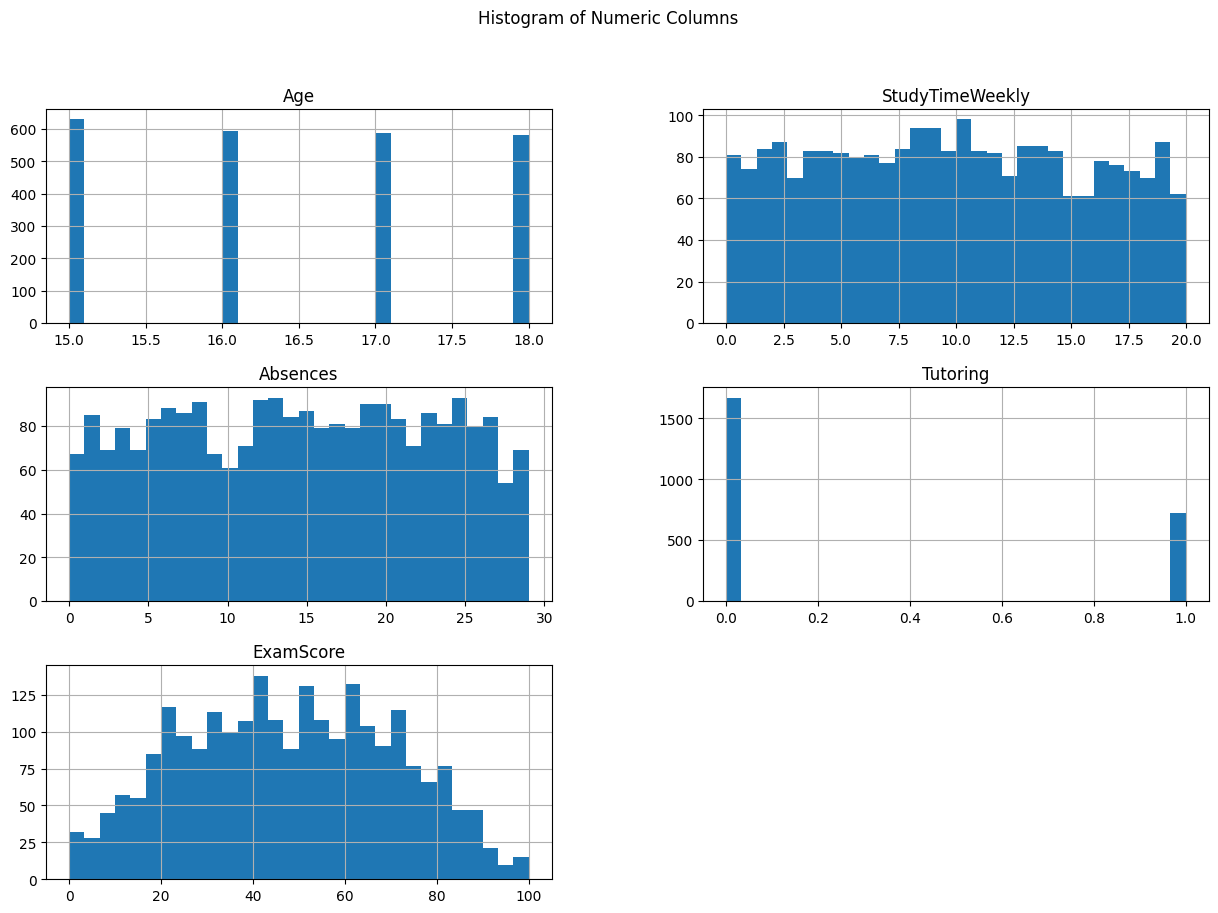

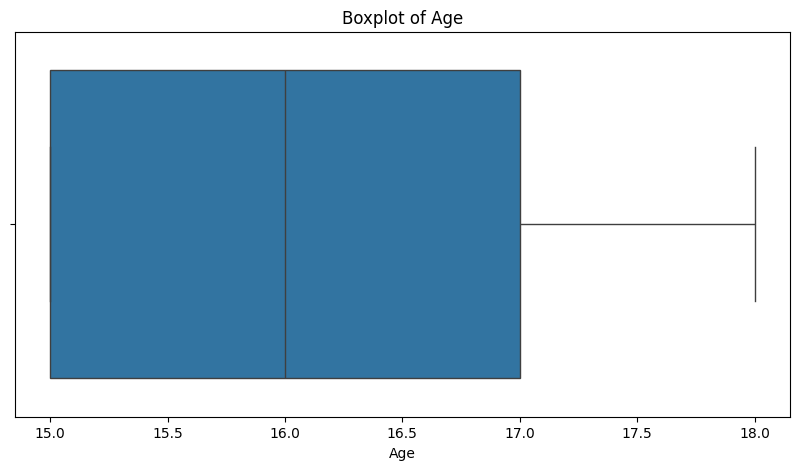

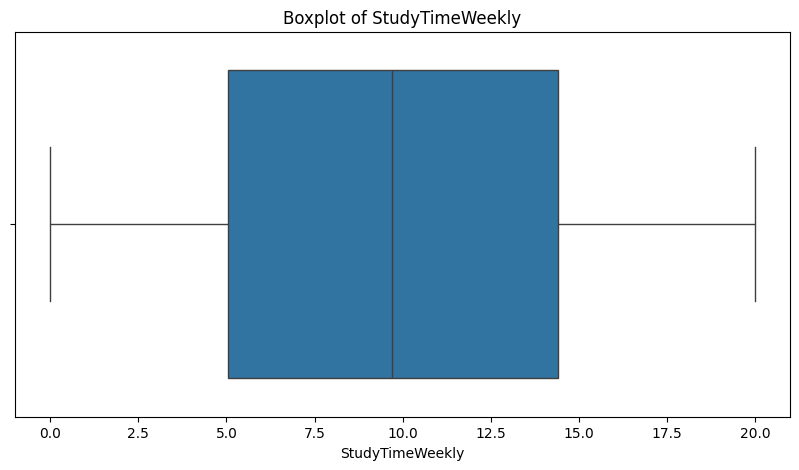

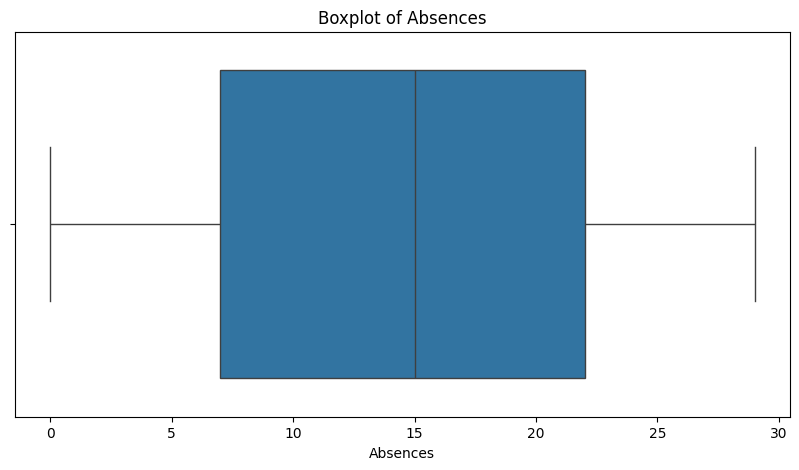

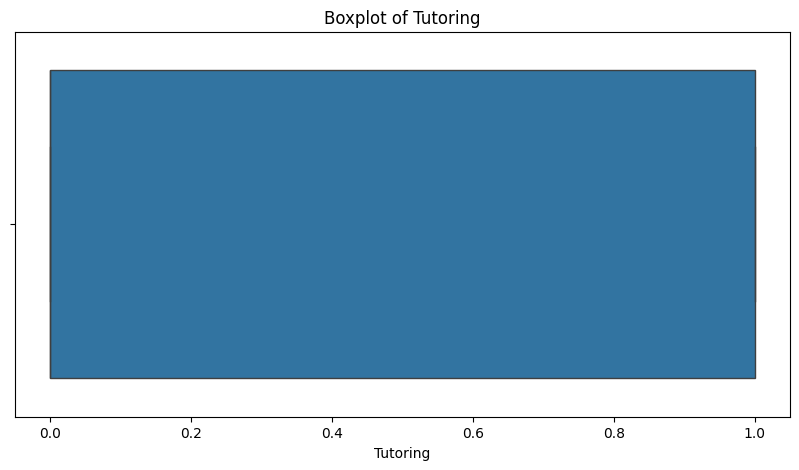

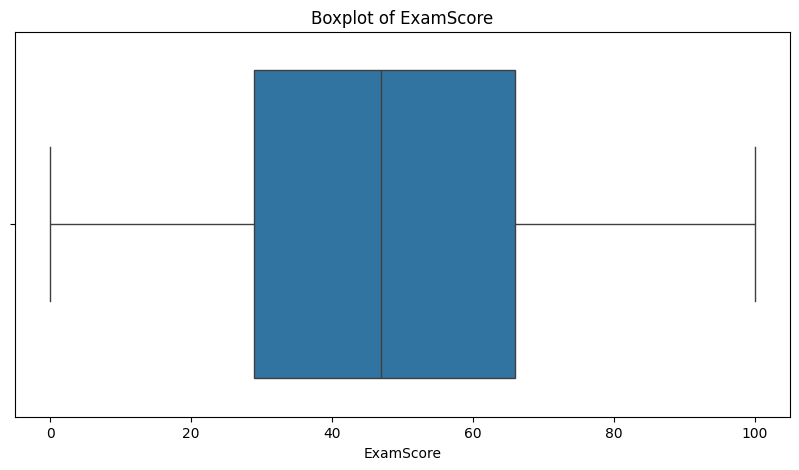

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Identifying numerical Columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns:")
print(numeric_cols)

# Skewness of Numeric Columns   
print("\nSkewness of Numeric Columns:")
print(df[numeric_cols].skew().sort_values(ascending=False))

#Describing the Data
print("\nDescribing the Data:")
print(df[numeric_cols].describe())

# Histogram of Numeric Columns
df[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle('Histogram of Numeric Columns')
plt.show()


for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



Shape of DataFrame After Dropping Rows:


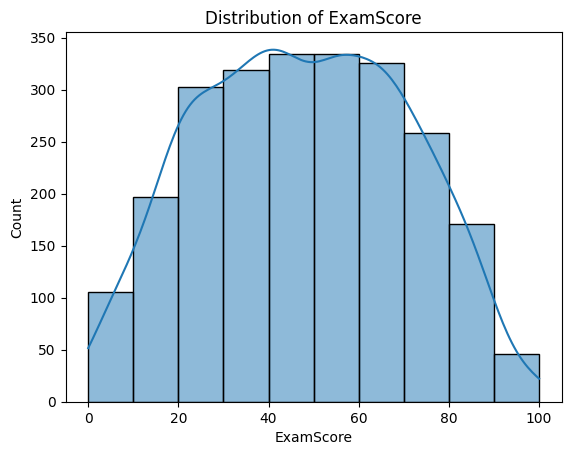

In [84]:
# Checking the Shape of the DataFrame After Dropping Rows
print("\nShape of DataFrame After Dropping Rows:")
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

# Histogram of scores
sns.histplot(df['ExamScore'], bins=10, kde=True)
plt.title('Distribution of ExamScore')
plt.xlabel('ExamScore')
plt.ylabel('Count')
plt.show()


Boxplot of ExamScore by Parental Education:


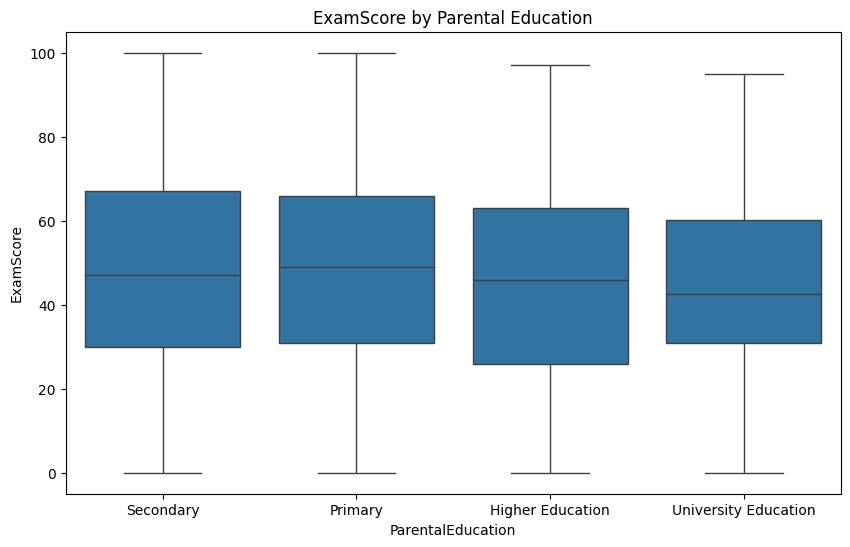

In [85]:
# Boxplot of scores by  Parental Education
print("\nBoxplot of ExamScore by Parental Education:")

plt.figure(figsize=(10, 6))
sns.boxplot(x='ParentalEducation', y='ExamScore', data=df)
plt.title('ExamScore by Parental Education')
plt.show()

In [86]:
# Preprocessing Categorical Features 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Define categorical and numerical features
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Result']
numerical_features_mean = ['StudyTimeWeekly', 'Absences']
numerical_features_mode = ['Tutoring', 'Age']

# Combine numerical features
cateogorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical mean features
numerical_mean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine numerical mode features
numerical_mode_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Combine all pipelines
preprocessor = ColumnTransformer(transformers=[
    ("categorical", cateogorical_pipeline, categorical_features),
    ("numerical_mean", numerical_mean_pipeline, numerical_features_mean),
    ("numerical_mode", numerical_mode_pipeline, numerical_features_mode)
],remainder="passthrough")

full_Pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression()
    )])

In [87]:
# Splitting the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Defining the features and target variable
x = df.drop(columns='ExamScore', axis=1)
y = df['ExamScore']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# training the model
full_Pipeline.fit(x_train, y_train)

# assessing the model
X_train_transformed = full_Pipeline.named_steps['preprocess'].transform(x_train)
X_test_transformed  = full_Pipeline.named_steps['preprocess'].transform(x_test)

In [88]:
# Making Predictions
print("\nMaking Predictions:")
y_pred = full_Pipeline.predict(x_test)
y_pred


Making Predictions:


array([ 34.36702313,  73.30000046,  47.37706071,  87.01937784,
         7.90114016,  68.79985123,  44.47074582,  58.70800434,
        54.0254955 ,  23.95799885,  61.63356749,  21.39889736,
        77.69041631,  68.81050971,  72.447933  ,   7.95277277,
        24.78992906,  36.95512023,  53.03491331,  68.78697731,
        53.48508204,  37.65914287,  39.55639476,  80.96704667,
        42.92818721,  19.8811456 ,  46.07476859,  63.79399107,
        53.71344863,  48.25366675,  51.61367245,  18.89140705,
        76.15621296,  78.95775992,  33.36305099,  43.8954062 ,
        79.06011796,  72.22267756,  81.06125176,  17.65491102,
        74.04036705,  85.11183657,  33.77299998,  58.21938939,
        21.0472261 ,  66.78324203,  75.29196319,  25.68256977,
        70.18726982,  35.95499307,  76.23726234,  76.54709419,
        37.54263963,  27.68244573,  41.9749259 ,  84.27350573,
        61.92537196,  82.69585507,  25.25379896,  52.87151429,
        41.45094644,  50.09545126,  58.54031013,  40.85

In [89]:
# Evaluating the Model
from sklearn.metrics import r2_score, mean_squared_error

# R² Score
print("\nR² Score:")
r2 = r2_score(y_test,y_pred)
r2


R² Score:


0.9482244681597526

In [90]:
# Mean Squared Error
print("\nMean Squared Error:")
mse = mean_squared_error(y_test,y_pred)
mse


Mean Squared Error:


26.754143438752497

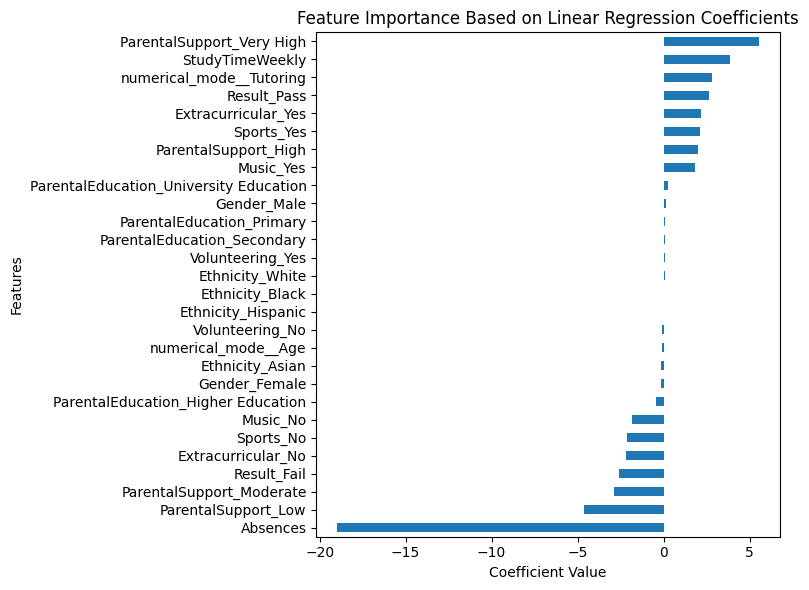

In [91]:
# Analyzing Feature Importance

# Getting the model and preprocessor from the pipeline
preprocessor = full_Pipeline.named_steps['preprocess']
model        = full_Pipeline.named_steps['model']

# Getting the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()
cleaned_feature_names = [
    name
    .replace("cat__onehot__", "")
    .replace("num_mean__", "")
    .replace("num_mode__", "")
    .replace("categorical__", "")
    .replace("numerical_mean__", "")
    for name in feature_names
]

# Getting the coefficients of the linear regression model
cofficients = pd.Series(model.coef_, index=cleaned_feature_names)
cofficients = cofficients.sort_values()

# Plotting the Feature Importance
plt.figure(figsize=(8,6))
cofficients.plot(kind="barh")
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [96]:
# Saving the Model
import pickle

pickle.dump(full_Pipeline, open("pipeline.pkl", "wb"))
loaded_pipeline = pickle.load(open("pipeline.pkl", "rb"))
print("Test  R²:", loaded_pipeline.score(x_test, y_test))

Test  R²: 0.9482244681597526
